In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [41]:
df = pd.read_csv('heart_data.csv')

In [42]:
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [44]:
df.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [45]:
print("Number of samples (rows):", len(df))
print("Number of features (columns):", len(df.columns))

Number of samples (rows): 70000
Number of features (columns): 14


In [50]:
# # Separate features and target variable
# X = df.drop(columns=['cardio'])
# y = df['cardio']

# Separate features and target variable
X_cont = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]  # Continuous features
X_cat = df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]  # Categorical features
y = df['cardio']  # Target variable

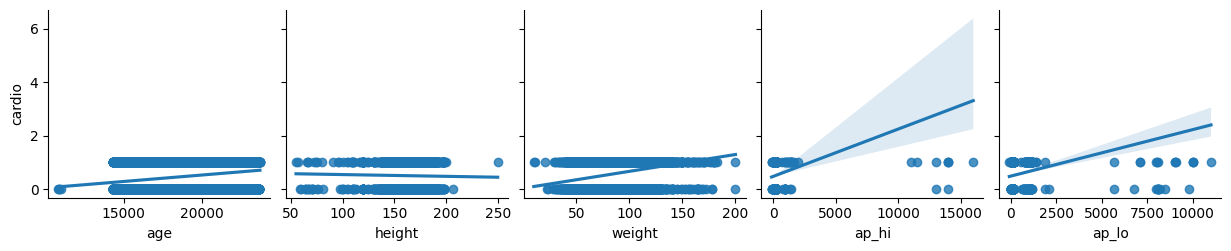

In [49]:
# Visualize relationships with target variable
sns.pairplot(df, x_vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'], y_vars='cardio', kind='reg')
plt.show()

In [53]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first')
X_cat_encoded = encoder.fit_transform(X_cat).toarray()

In [54]:
# Combine continuous and encoded categorical features
X = np.concatenate((X_cont, X_cat_encoded), axis=1)

In [104]:
# # Split the data into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# # Split the data into training, validation, and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1765, random_state=42)  # 0.1765 x 0.85 = 0.15

In [105]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Fit logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluate logistic regression accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)


Logistic Regression Accuracy: 0.7194285714285714


In [106]:
# Define the default FNN model architecture with the best hyperparameters
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [120]:
# Compile the model with the best learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [121]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_val_scaled, y_val))

Epoch 1/20
1532/1532 [==============================] - 16s 8ms/step - loss: 0.5375 - accuracy: 0.7373 - val_loss: 0.5363 - val_accuracy: 0.7406
Epoch 2/20
1532/1532 [==============================] - 7s 5ms/step - loss: 0.5369 - accuracy: 0.7360 - val_loss: 0.5370 - val_accuracy: 0.7387
Epoch 3/20
1532/1532 [==============================] - 7s 5ms/step - loss: 0.5362 - accuracy: 0.7375 - val_loss: 0.5365 - val_accuracy: 0.7391
Epoch 4/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.5363 - accuracy: 0.7379 - val_loss: 0.5381 - val_accuracy: 0.7354
Epoch 5/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.5357 - accuracy: 0.7378 - val_loss: 0.5365 - val_accuracy: 0.7392
Epoch 6/20
1532/1532 [==============================] - 6s 4ms/step - loss: 0.5358 - accuracy: 0.7373 - val_loss: 0.5367 - val_accuracy: 0.7383
Epoch 7/20
1532/1532 [==============================] - 5s 3ms/step - loss: 0.5353 - accuracy: 0.7379 - val_loss: 0.5374 - val_accuracy

In [122]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

329/329 [==============================] - 1s 3ms/step - loss: 0.5457 - accuracy: 0.7401
Test Loss: 0.5457237958908081
Test Accuracy: 0.7400952577590942


In [123]:
# Generate predictions on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int)

329/329 [==============================] - 1s 2ms/step


In [124]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5222
           1       0.76      0.70      0.73      5278

    accuracy                           0.74     10500
   macro avg       0.74      0.74      0.74     10500
weighted avg       0.74      0.74      0.74     10500



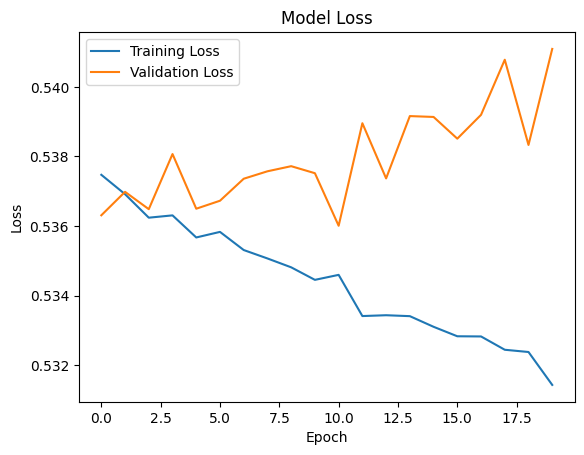

In [125]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()